### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

From data.info() we can notice most of the features are catagorical and a few are numarical

In [10]:
data.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

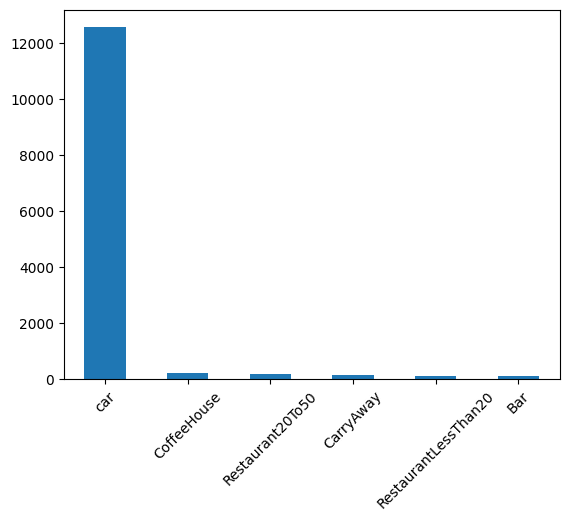

In [12]:
# Check for missing values  
missing_values = data.isnull().sum().sort_values(ascending=False)

#print(missing_values[missing_values > 0])

missing_values[missing_values > 0].plot(kind = 'bar')
plt.tick_params("x", rotation=45)

Since 99% of the values in the "car" column are missing and cannot be inferred from other data, this feature has minimal impact on predicting whether a customer accepts a coupon. Therefore, it can be removed from the analysis.

In [14]:
# Summary statistics  
data_summary = data.describe()  
print(data_summary) 

        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

<Axes: >

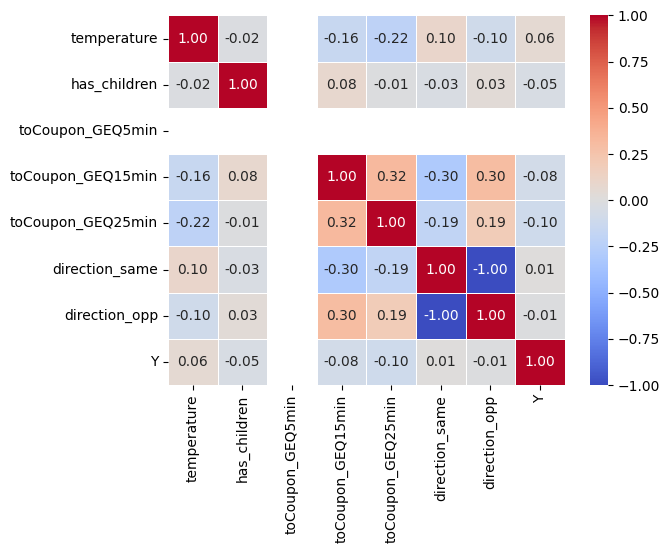

In [16]:
numeric_data = data.select_dtypes(include=['number'])  # Keep only numeric columns
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


3. Decide what to do about your missing data -- drop, replace, other...

In [18]:
duplicate = data[data.duplicated()]
duplicate

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


In [20]:
# Drop duplicate data
data = data.drop_duplicates()
#data

Since 99% of the values in the "car" column are missing and cannot be inferred from other data, this feature has minimal impact on predicting whether a customer accepts a coupon. Therefore, it can be removed from the analysis.

In [23]:
# Drop columns
data = data.drop(columns=['car'])

Since the features 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' have less than 1% missing values, we can replace them with the most frequently occurring value in their respective columns.

In [26]:
# Replace missing values with most frequently occurring value

data['Bar'] = data['Bar'].fillna(data['Bar'].value_counts().index[0])

data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])

data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])

data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])

data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])

4. What proportion of the total observations chose to accept the coupon?



In [28]:
#data['Y'].value_counts()

accepted_ratio = data['Y'].mean()
print(f'Proportion of customers who accepted the coupon: {accepted_ratio:.2%}')

Proportion of customers who accepted the coupon: 56.76%


5. Use a bar plot to visualize the `coupon` column.

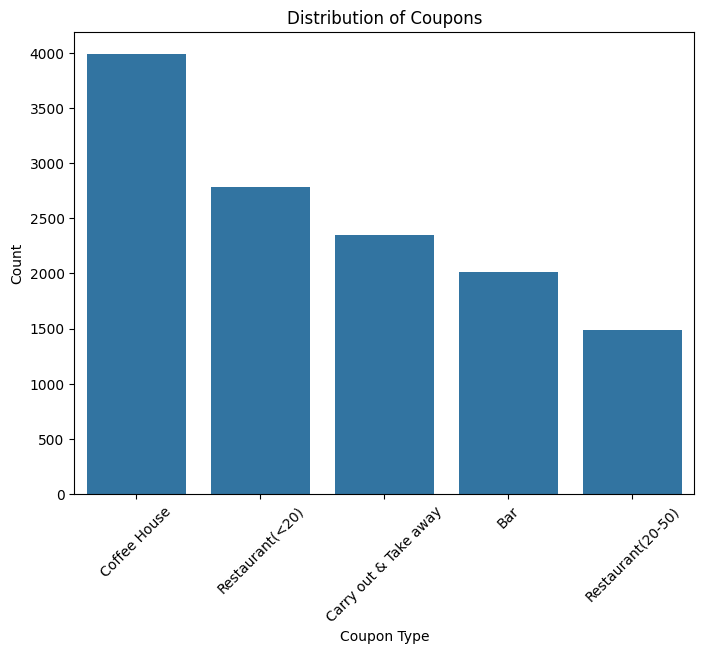

In [31]:
# Count values in the 'coupon' column
coupon_counts = data['coupon'].value_counts()

# Plot Bar
plt.figure(figsize=(8, 6))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.title('Distribution of Coupons')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

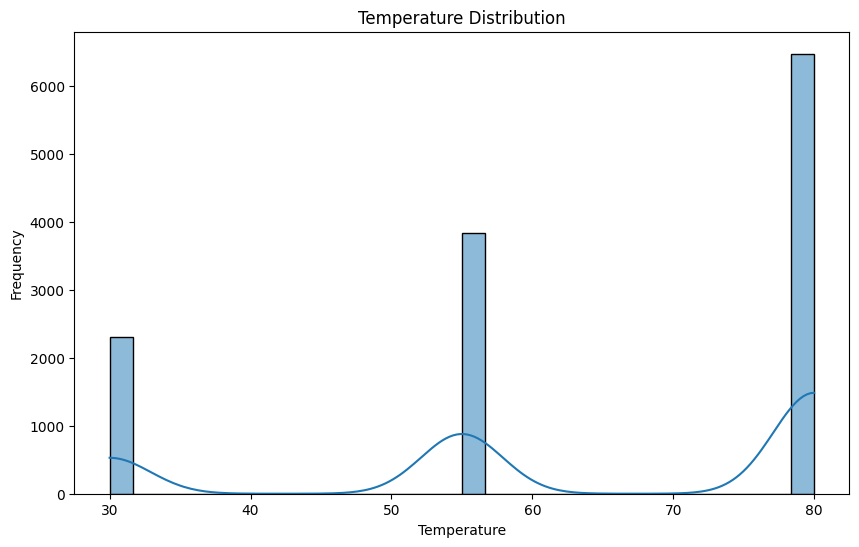

In [34]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], bins=30, kde=True)

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [36]:
bar_coupons_df = data[data['coupon'] == 'Bar']
bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [38]:
bar_coupons_accepted_ratio = bar_coupons_df['Y'].mean()
print(f"Proportion of customers who accepted the coupon: {bar_coupons_accepted_ratio:.2%}")

Proportion of customers who accepted the coupon: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [40]:
bar_coupons_df['BarFrequency'] = bar_coupons_df['Bar'].apply(lambda x: 'Low' if x in ['never', 'less1', '1~3'] else 'High')

acceptance_rate = bar_coupons_df.groupby('BarFrequency')['Y'].mean()
print(acceptance_rate)

BarFrequency
High    0.768844
Low     0.370514
Name: Y, dtype: float64


/var/folders/lr/ztqd6y9j6n7_0kp48vqp9m7h0000gq/T/ipykernel_86009/3013683628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['BarFrequency'] = bar_coupons_df['Bar'].apply(lambda x: 'Low' if x in ['never', 'less1', '1~3'] else 'High')


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [42]:
# Define the two comparison groups
group_1 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['gt8', '4~8'])) & (bar_coupons_df['age'].isin(['26', '31', '36', '41', '46', '50plus']))]
group_2 = bar_coupons_df[~((bar_coupons_df['Bar'].isin(['gt8', '4~8'])) & (bar_coupons_df['age'].isin(['26', '31', '36', '41', '46', '50plus'])))]

# Acceptance rate between the two groups (Age > 25 vs All others)
acceptance_rate_1 = group_1['Y'].mean()
acceptance_rate_2 = group_2['Y'].mean()

print(f"Acceptance Rate (Bar > Once & Age > 25): {acceptance_rate_1:.2f}")
print(f"Acceptance Rate (Others): {acceptance_rate_2:.2f}")

Acceptance Rate (Bar > Once & Age > 25): 0.77
Acceptance Rate (Others): 0.38


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [44]:
# Define filtering conditions
group_1 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['gt8', '4~8'])) &
             (bar_coupons_df['passanger'] != 'Kid(s)') &
             (bar_coupons_df['occupation'] != 'Farming Fishing & Forestry')]

group_2 = bar_coupons_df[~((bar_coupons_df['Bar'].isin(['gt8', '4~8'])) &
               (bar_coupons_df['passanger'] != 'Kid(s)') &
               (bar_coupons_df['occupation'] != 'Farming Fishing & Forestry'))]

# Calculate acceptance rate
acceptance_rate_1 = group_1["Y"].mean()
acceptance_rate_2 = group_2["Y"].mean()

print(f"Acceptance Rate (Bar > Once, No Kids, Other Jobs): {acceptance_rate_1:.2f}")
print(f"Acceptance Rate (Others): {acceptance_rate_2:.2f}")

Acceptance Rate (Bar > Once, No Kids, Other Jobs): 0.77
Acceptance Rate (Others): 0.37


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [46]:
#bar_coupons_df['RestaurantLessThan20'].unique()

# Define three filtering conditions
condition_1 = (bar_coupons_df['Bar'].isin(['gt8', '4~8'])) & (bar_coupons_df['passanger'] != 'Kid(s)') & (bar_coupons_df['maritalStatus'] != 'Widowed')

condition_2 = (bar_coupons_df['Bar'].isin(['gt8', '4~8'])) & (bar_coupons_df['age'].isin(['21', '26', 'below21']))

condition_3 = (bar_coupons_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (bar_coupons_df['income'].isin(['$37500 - $49999', '$12500 - $24999', 
                                                                     '$25000 - $37499', 'Less than $12500']))

# Filter data using OR operator
group_1 = bar_coupons_df[condition_1 | condition_2 | condition_3]
group_2 = bar_coupons_df[~(condition_1 | condition_2 | condition_3)]

# Calculate acceptance rates
acceptance_rate_1 = group_1['Y'].mean()
acceptance_rate_2 = group_2['Y'].mean()

print(f"Acceptance Rate (Qualifies for any condition): {acceptance_rate_1:.2f}")
print(f"Acceptance Rate (Others): {acceptance_rate_2:.2f}")

Acceptance Rate (Qualifies for any condition): 0.53
Acceptance Rate (Others): 0.37


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Observations:
1. People who go to bars more than 3 times a month have a much higher acceptance rate (77%) compared to those who go less often (37%)
2. Drivers over 25 who go to bars often still accept coupons at a 77% rate, similar to yonger drivers.
3. Drivers with passengers (not kids) and non-farming jobs also have a high acceptance rate (77%)
4. Expanding the group to include young bar-goers, non-widowed people, and price-concious diners dropped the acceptance rate to 53%, meaning not all factors drive coupon acceptance equally.

#### Hypothesis:
1. Social & frequent bar goers are the most likely to accept coupons.
2. Young age & price consciousness play a role, but are less influential.
3. Bars should target habitual customers directly for better promotion success.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Create a new DataFrame that contains just the Restaurant(<20) coupons.

In [49]:
resturant_coupons_df = data[data['coupon'] == 'Restaurant(<20)']
resturant_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
10,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
11,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1


##### Proportion of Restaurant(<20) coupons were accepted

In [51]:
proportion_accepted = resturant_coupons_df['Y'].mean()
print(f'Proportion of RestaurantLessThan20 coupons accepted: {proportion_accepted:.2%}')

Proportion of RestaurantLessThan20 coupons accepted: 70.78%


##### Acceptance rate between those who went to a Restaurant(<20) 3 or fewer times a month to those who went more.

In [53]:
## Acceptance Rate: Those Who Visit Cheap Restaurants 3 or Fewer Times vs. More
acceptance_rate_by_visits = resturant_coupons_df.groupby(resturant_coupons_df['RestaurantLessThan20'].isin(['never', 'less1', '1~3']))['Y'].mean()
print(acceptance_rate_by_visits)

RestaurantLessThan20
False    0.730379
True     0.693396
Name: Y, dtype: float64


##### Acceptance rate between drivers who go to a Restaurant(<20) more than once a month and are over the age of 25 to the all others. Is there a difference

In [55]:
## Acceptance Rate: Frequent Cheap Restaurant Visitors Over 25 vs. Others

acceptance_rate_by_age = resturant_coupons_df.groupby((resturant_coupons_df['RestaurantLessThan20'].isin(['gt8', '4~8'])) & (resturant_coupons_df['age'].isin(['26', '31', '36', '41', '46', '50plus'])))['Y'].mean()
print(acceptance_rate_by_age)

False    0.704893
True     0.714810
Name: Y, dtype: float64


##### Acceptance rate between drivers who go to Restaurant(<20) more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [58]:
## Acceptance Rate: Frequent Visitors with No Kids & Excluding Certain Occupations
acceptance_rate_by_occupation = resturant_coupons_df.groupby((resturant_coupons_df["RestaurantLessThan20"].isin(["gt8", "4~8"])) & (resturant_coupons_df["passanger"] != "Kid(s)") & (resturant_coupons_df['occupation'] != 'Farming Fishing & Forestry'))["Y"].mean()
print(acceptance_rate_by_occupation)

False    0.697946
True     0.725971
Name: Y, dtype: float64


##### Acceptance rates between those drivers who:
go to Restaurant(<20) more than once a month, had passengers that were not a kid, and were not widowed OR
go to Restaurant(<20) more than once a month and are under the age of 30 OR
go to cheap restaurants more than 4 times a month and income is less than 50K.

In [61]:
condition_1 = (resturant_coupons_df["RestaurantLessThan20"].isin(["gt8", "4~8"])) & (resturant_coupons_df["passanger"] != "Kid(s)") & (resturant_coupons_df["maritalStatus"] != "Widowed")
condition_2 = (resturant_coupons_df["RestaurantLessThan20"].isin(["gt8", "4~8"])) & (resturant_coupons_df["age"].isin(["21", "26", "31", "below21"]))
condition_3 = (resturant_coupons_df["RestaurantLessThan20"].isin(["gt8", "4~8"])) & (resturant_coupons_df["income"].isin(["$37500 - $49999", "$12500 - $24999", "$25000 - $37499", "Less than $12500"]))

group_1 = resturant_coupons_df[condition_1 | condition_2 | condition_3]
group_2 = resturant_coupons_df[~(condition_1 | condition_2 | condition_3)]

acceptance_rate_group_1 = group_1["Y"].mean()
acceptance_rate_group_2 = group_2["Y"].mean()

print(f"Acceptance Rate (Qualifies for any condition): {acceptance_rate_group_1:.2f}")
print(f"Acceptance Rate (Others): {acceptance_rate_group_2:.2f}")


Acceptance Rate (Qualifies for any condition): 0.73
Acceptance Rate (Others): 0.70


#### Observations:
1. Overall acceptance rate (70.78%) suggests that coupons for cheaper restaurants are generally apealing.
2. Drivers who visit cheap restaurants more than 3 times a month have a slightly higher acceptance rate (73%) compared to those who visit less often (69.3%)
3. Acceptance rate among frequent resturant visitors over 25 (71.5%) vs under 25 (70.5%) suggest that age is not a major factor.
4. Drivers who do not have kid passengers and are not in farming, fishing or forestry accept coupons at a higher rate (72.6%) compared to others (69.8%) suggests that drivers with social or professional flexibility may be more likely to take advantage of discounts.
5. Acceptance rate for those who met the specified conditions (73%) was slightly higher than for everyone else (70%), this confirms that factors like age, passenger type and income influce coupon behavior

#### Hypothesis:
1. Frequent dinners are more likely to accept the coupons
2. Passengers & occupations influence acceptance
3. Age and income play minor roles